# STIX python tutorial

## STIX in 60 seconds

* 4 data processing chains
    * House Keeping (HK) - instantaneous measurements ever 64s
    * Quick Look (QL) - count data accumulated over 4s
    * Science Data (SCI) - count data obtain at variable native cadence
    * Energy Calibration (CAL) - count data obtained in "quite" times


## Quick Look
### Search & Download

In [5]:
from sunpy.net import Fido, attrs as a
from stixpy.net import client # Registers stixpy with Fido

query = Fido.search(a.Time('2021-12-15', '2021-12-15T23:59:59'), a.Instrument.stix)

        Use sunpy.net.Scraper instead. [stixpy.net.client]


In [6]:
ql_query

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
object,object,str4,str2,str3,str13,str3,str21
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-lightcurve,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-background,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-variance,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-spectra,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-flareflag,V01,-
2021-12-15 01:03:29.000,2021-12-15 01:06:20.000,STIX,L1,SCI,sci-xray-cpd,V01,2112150017
2021-12-15 01:16:27.000,2021-12-15 01:31:36.000,STIX,L1,SCI,sci-xray-cpd,V01,2112150018
2021-12-15 01:35:27.000,2021-12-15 01:58:04.000,STIX,L1,SCI,sci-xray-cpd,V01,2112150037
2021-12-15 02:07:11.000,2021-12-15 02:13:27.000,STIX,L1,SCI,sci-xray-cpd,V01,2112150019


Could filter the results for specific data

In [9]:
ql_mask = query['stix']['DataType'] == 'QL'
ql_query['stix'][ql_mask]

Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
object,object,str4,str2,str3,str13,str3,str21
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-lightcurve,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-background,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-variance,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-spectra,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-flareflag,V01,-


But stixpy add a number of STIX specific attrs:
 * `a.stix.DataType` - a type of data e.g. ql, cal, sci, hk
 * `a.stix.DataProduct` - a specific product e.g. ql-background

so the same results can be achieved using the `a.stix.DataType` attr

In [12]:
ql_query = Fido.search(a.Time('2021-12-15', '2021-12-15T23:59:59'), 
                    a.Instrument.stix, a.stix.DataType.ql)
ql_query


        Use sunpy.net.Scraper instead. [stixpy.net.client]


Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
object,object,str4,str2,str2,str13,str3,str1
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-lightcurve,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-background,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-variance,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-spectra,V01,-
2021-12-15 00:00:00.000,2021-12-15 23:59:59.999,STIX,L1,QL,ql-flareflag,V01,-


Now lets download some QL data

In [15]:
ql_files = Fido.fetch(query)
ql_files

['/Users/shane/sunpy/data/solo_L1_stix-ql-flareflag_20211215_V01.fits', '/Users/shane/sunpy/data/solo_L1_stix-ql-spectra_20211215_V01.fits', '/Users/shane/sunpy/data/solo_L1_stix-ql-variance_20211215_V01.fits', '/Users/shane/sunpy/data/solo_L1_stix-ql-lightcurve_20211215_V01.fits', '/Users/shane/sunpy/data/solo_L1_stix-ql-background_20211215_V01.fits']

## !!! Note the order of the returned files can change !!!

Once we have the data we can load and plot

### Plotting

In [17]:
from sunpy.timeseries import TimeSeries
from stixpy import timeseries # Registers stixpy TimeSeries with sunpy.TimeSeries

ql_lc = TimeSeries(ql_files[-2])

Small textual representation of the data

In [18]:
ql_lc

QLLightCurve
    Start: 2021-12-15 00:00:02
    End:   2021-12-15 23:59:58
    Center:2021-12-15 12:00:00
    Duration:0.9999537037037036 days or
           23.998888888888885 hours or
           1439.9333333333332 minutes or
           86396.0 seconds

We can plot the data using the `plot()` method

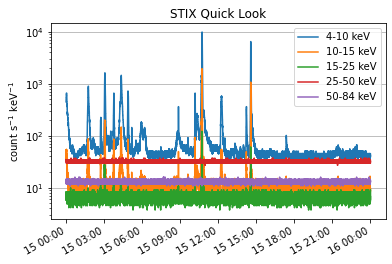

In [21]:
ql_lc.plot();

Just like a normal plot we can interact with it as usual

(18976.375, 18976.5)

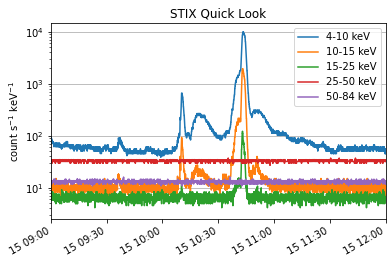

In [36]:
from datetime import datetime
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

ql_lc.plot(axes=ax);
ax.set_xlim([datetime(2021, 12, 15, 9), datetime(2021, 12, 15, 12)])
# ax.set_yscale('linear')

## Science Data
Types or level (lower case l0:
* Raw Pixel Data (RPD) or l0 - most raw form uncompress archive buffer
* Compressed Pixel Data (CPD) or l1 - compressed and optionally summed over time or energy ✅
* Summed Compressed Pixel Data (SCPD) or l2 - summed over pixels and optionally summed over time or energy
* Visibility or l3 - pixels converted to visibilities on board and optionally summed over time or energy
* Spectrogram or l4 - all pixel and detectors summed into spectrogram and and optionally summed over time or energy ✅
* Burst Aspect - high cadence aspect data

## Spectrograms
### Search & Download
Let use the `a.stix.DataProduct` attr to only search for Spectrogram data

In [35]:
spec_query = Fido.search(a.Time('2021-12-15T09:00', '2021-12-15T12:00:00'), 
                         a.Instrument.stix, a.stix.DataProduct.sci_xray_spec)
spec_query

        Use sunpy.net.Scraper instead. [stixpy.net.client]


Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str13,str3,int64
2021-12-15 07:18:31.000,2021-12-15 10:00:59.000,STIX,L1,SCI,sci-xray-spec,V01,2112150006
2021-12-15 07:18:31.000,2021-12-15 10:00:59.000,STIX,L1,SCI,sci-xray-spec,V01,2112156715
2021-12-15 09:57:01.000,2021-12-15 10:32:09.000,STIX,L1,SCI,sci-xray-spec,V01,2112150007
2021-12-15 09:57:01.000,2021-12-15 10:32:09.000,STIX,L1,SCI,sci-xray-spec,V01,2112155435
2021-12-15 10:29:12.000,2021-12-15 12:09:42.000,STIX,L1,SCI,sci-xray-spec,V01,2112150008
2021-12-15 10:29:12.000,2021-12-15 12:09:42.000,STIX,L1,SCI,sci-xray-spec,V01,2112153435
2021-12-15 10:31:13.000,2021-12-15 11:00:44.000,STIX,L1,SCI,sci-xray-spec,V01,2112150016
2021-12-15 10:31:13.000,2021-12-15 11:00:44.000,STIX,L1,SCI,sci-xray-spec,V01,2112156884
2021-12-15 11:55:52.000,2021-12-15 12:53:04.000,STIX,L1,SCI,sci-xray-spec,V01,2112150009


In [37]:
spec_query = Fido.search(a.Time('2021-12-15T10:30', '2021-12-15T11:01:00'), 
                         a.Instrument.stix, a.stix.DataProduct.sci_xray_spec)
spec_query

        Use sunpy.net.Scraper instead. [stixpy.net.client]


Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str13,str3,int64
2021-12-15 09:57:01.000,2021-12-15 10:32:09.000,STIX,L1,SCI,sci-xray-spec,V01,2112150007
2021-12-15 09:57:01.000,2021-12-15 10:32:09.000,STIX,L1,SCI,sci-xray-spec,V01,2112155435
2021-12-15 10:31:13.000,2021-12-15 11:00:44.000,STIX,L1,SCI,sci-xray-spec,V01,2112150016
2021-12-15 10:31:13.000,2021-12-15 11:00:44.000,STIX,L1,SCI,sci-xray-spec,V01,2112156884


In [50]:
spec_files = Fido.fetch(spec_query[-2:])
[s.split('/')[-1] for s in spec_files]

['solo_L1_stix-sci-xray-spec_20211215T095701-20211215T103209_V01_2112150007-53946.fits',
 'solo_L1_stix-sci-xray-spec_20211215T103113-20211215T110044_V01_2112150016-54143.fits',
 'solo_L1_stix-sci-xray-spec_20211215T103113-20211215T110044_V01_2112156884-60145.fits',
 'solo_L1_stix-sci-xray-spec_20211215T095701-20211215T103209_V01_2112155435-59952.fits']

In [51]:
from stixpy.science import ScienceData
spec0 = ScienceData.from_fits(spec_files[1])
spec1 = ScienceData.from_fits(spec_files[2])

spec0, spec1

(Spectrogram   <sunpy.time.timerange.TimeRange object at 0x1200302b0>
     Start: 2021-12-15 10:31:13
     End:   2021-12-15 11:00:44
     Center:2021-12-15 10:45:59
     Duration:0.020489583333333283 days or
            0.4917499999999988 hours or
            29.504999999999928 minutes or
            1770.2999999999956 seconds
     DetectorMasks
     [0]: [0,1,2,3,4,5,6,7,_,_,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
 
     PixelMasks
     [0...953]: [['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']]
 
     EnergyMasks
     [0]: [_,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,_,_,_,_,_,_,_,_,_,_,_,_,_,_],
 Spectrogram   <sunpy.time.timerange.TimeRange object at 0x1200302b0>
     Start: 2021-12-15 10:31:13
     End:   2021-12-15 11:00:44
     Center:2021-12-15 10:45:59
     Duration:0.020489583333333283 days or
            0.4917499999999988 hours or
            29.504999999999928 minutes or
            1770.2999999999956 seconds
     DetectorMasks
     [0]: [0,1

### Plotting

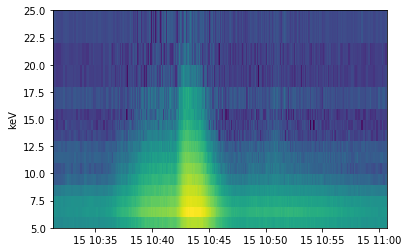

In [85]:
spec0.plot_spectrogram();

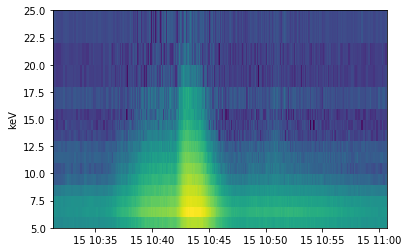

In [53]:
spec1.plot_spectrogram();

<AxesSubplot:ylabel='$\\mathrm{keV}$'>

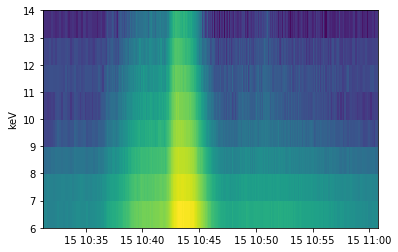

In [56]:
spec1.plot_spectrogram(energy_indices=list(range(1, 11)))

<AxesSubplot:ylabel='$\\mathrm{keV}$'>

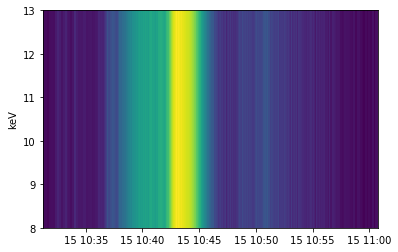

In [59]:
spec1.plot_spectrogram(energy_indices=[[1, 5,],[5, 10],[10,16]])

No handles with labels found to put in legend.


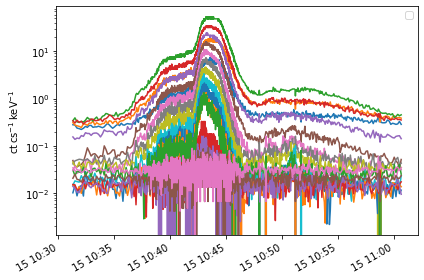

In [62]:
spec0.plot_timeseries();

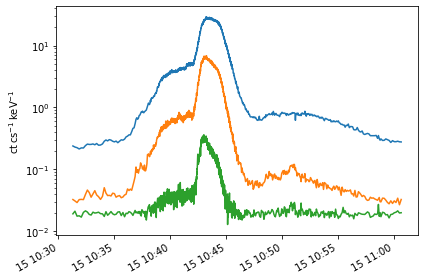

In [63]:
spec0.plot_timeseries(energy_indices=[[1, 5,],[5, 10],[10,16]])

In [64]:
spec0.times.shape

(954,)

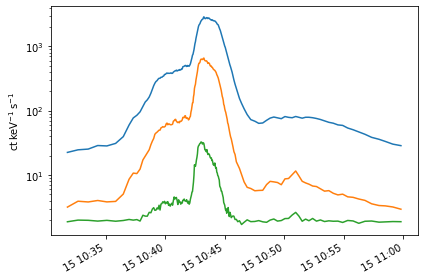

In [71]:
spec0.plot_timeseries(time_indices=[(i*5, (i+1)*5) for i in range(190)],
                      energy_indices=[[1, 5,],[5, 10],[10,16]])

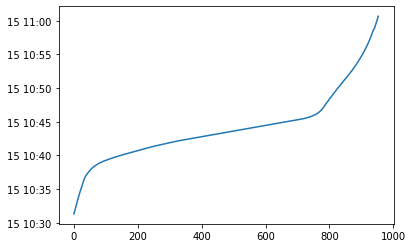

In [72]:
plt.plot(spec0.times.datetime)

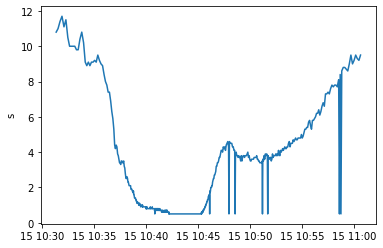

In [75]:
plt.plot(spec0.times.datetime, spec0.data['timedel'].to('s'))

## Compressed Pixel Data 
### Search & Download

In [77]:
cpd_query = Fido.search(a.Time('2021-12-15T10:30', '2021-12-15T11:01:00'), 
                         a.Instrument.stix, a.stix.DataProduct.sci_xray_cpd)
cpd_query['stix'][2:-1]

        Use sunpy.net.Scraper instead. [stixpy.net.client]


Start Time,End Time,Instrument,Level,DataType,DataProduct,Ver,Request ID
str23,str23,str4,str2,str3,str12,str3,int64
2021-12-15 10:35:15.000,2021-12-15 10:48:12.000,STIX,L1,SCI,sci-xray-cpd,V01,2112150049
2021-12-15 10:35:34.000,2021-12-15 10:47:15.000,STIX,L1,SCI,sci-xray-cpd,V01,2112150054


In [79]:
cpd_files = Fido.fetch(cpd_query['stix'][2:-1])

In [80]:
cpd0 = ScienceData.from_fits(cpd_files[0])
cpd1 = ScienceData.from_fits(cpd_files[1])

cpd0, cpd1

(CompressedPixelData   <sunpy.time.timerange.TimeRange object at 0x122c76fd0>
     Start: 2021-12-15 10:35:15
     End:   2021-12-15 10:48:12
     Center:2021-12-15 10:41:43
     Duration:0.008994212962962989 days or
            0.21586111111111173 hours or
            12.951666666666704 minutes or
            777.1000000000022 seconds
     DetectorMasks
     [0...773]: [_,_,_,_,_,_,_,_,_,9,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_]
 
     PixelMasks
     [0...773]: [['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']]
 
     EnergyMasks
     [0]: [_,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,_,_,_,_],
 CompressedPixelData   <sunpy.time.timerange.TimeRange object at 0x122c76fd0>
     Start: 2021-12-15 10:35:34
     End:   2021-12-15 10:47:15
     Center:2021-12-15 10:41:24
     Duration:0.008119212962962974 days or
            0.19486111111111137 hours or
            11.691666666666682 minutes or
            701.5000000000009 seconds
     DetectorMasks
    

### Plotting
Let's have a look at the spectrogram plots

<AxesSubplot:ylabel='$\\mathrm{keV}$'>

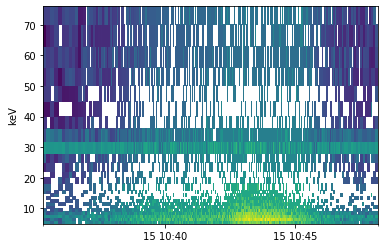

In [81]:
cpd0.plot_spectrogram()

<AxesSubplot:ylabel='$\\mathrm{keV}$'>

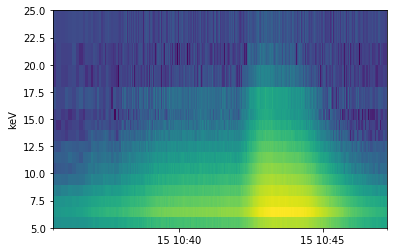

In [82]:
cpd1.plot_spectrogram()

The `cpd0` spectrogram is noisier due to the fact it only contains one detector.
`CompressedPixelData` support the same methods as `Spectrogram` so we can plot lightcurves of timeseries and spectrogram but it additionally has `plot_pixels()` methods.

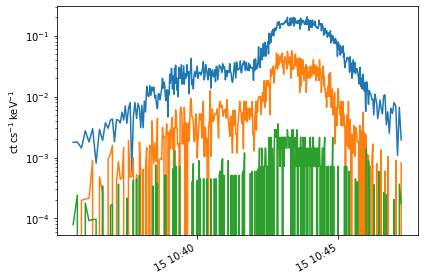

In [84]:
cpd1.plot_timeseries(energy_indices=[[1, 5,],[5, 10],[10,16]])

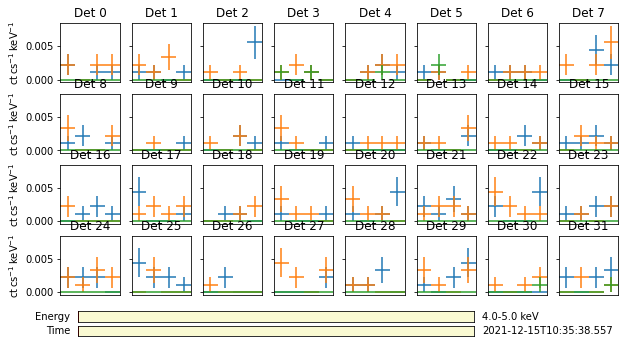

In [83]:
cpd1.plot_pixels()